# Задание 1

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pyreadstat

df, meta = pyreadstat.read_dta('bwght.dta')
df.head(5)

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [15]:
#OLS
X = df[['male', 'parity', 'lfaminc', 'cigs']]
X = sm.add_constant(X)
y = df['lbwght']

model = sm.OLS(y, X, missing='drop') 
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lbwght   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     12.55
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.90e-10
Time:                        22:08:34   Log-Likelihood:                 356.03
No. Observations:                1388   AIC:                            -702.1
Df Residuals:                    1383   BIC:                            -675.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6756      0.022    213.681      0.0

In [16]:
#2SLS
first_stage = smf.ols("cigs ~ cigprice + male + parity + lfaminc", data=df).fit()
df["cigs_hat"] = first_stage.fittedvalues

second_stage = smf.ols("lbwght ~ cigs_hat + male + parity + lfaminc", data=df).fit()

In [17]:
print(first_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                   cigs   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     10.86
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           1.14e-08
Time:                        22:08:35   Log-Likelihood:                -4428.2
No. Observations:                1388   AIC:                             8866.
Df Residuals:                    1383   BIC:                             8892.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7482      2.080      1.321      0.1

In [18]:
print(second_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                 lbwght   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.857
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           1.83e-05
Time:                        22:08:35   Log-Likelihood:                 344.91
No. Observations:                1388   AIC:                            -679.8
Df Residuals:                    1383   BIC:                            -653.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4679      0.153     29.231      0.0

In [19]:
#OLS + cigprice
X = df[['male', 'parity', 'lfaminc', 'cigs', 'cigprice']]
X = sm.add_constant(X)
y = df['lbwght']

model = sm.OLS(y, X, missing='drop') 
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lbwght   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     10.43
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           7.63e-10
Time:                        22:08:35   Log-Likelihood:                 356.99
No. Observations:                1388   AIC:                            -702.0
Df Residuals:                    1382   BIC:                            -670.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5890      0.066     69.256      0.0

# Задание 5

In [20]:
df, meta = pyreadstat.read_dta('class.dta')
df.head(5)

,schlcode,enrollment,classize,avgmath,avgverb,disadv
0,11005,54,28,74.110001,70.570000,24
1,11005,54,26,71.110001,75.000000,24
2,11006,37,22,64.000000,75.470001,38
3,11006,37,15,50.000000,60.647499,38
4,11009,32,32,68.379997,73.970001,6


In [21]:
df = df[(df["enrollment"] >= 20) & (df["enrollment"] <= 60)]
df["large_cohort"] = (df["enrollment"] >= 40).astype(int)

In [22]:
#OLS1
X = df[['classize']]
X = sm.add_constant(X)
y = df['avgmath']

model = sm.OLS(y, X, missing='drop') 
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     17.03
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.13e-05
Time:                        22:08:36   Log-Likelihood:                -2620.5
No. Observations:                 699   AIC:                             5245.
Df Residuals:                     697   BIC:                             5254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6124      1.982     28.557      0.0

In [23]:
#OLS2
X = df[['classize', 'disadv', 'enrollment']]
X = sm.add_constant(X)
y = df['avgmath']

model = sm.OLS(y, X, missing='drop') 
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           6.26e-56
Time:                        22:08:37   Log-Likelihood:                -2498.6
No. Observations:                 699   AIC:                             5005.
Df Residuals:                     695   BIC:                             5023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.9999      2.050     32.689      0.0

In [35]:
#RDD
model = smf.ols("avgmath ~ large_cohort + classize + disadv + enrollment", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     82.09
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.71e-57
Time:                        22:30:26   Log-Likelihood:                -2493.6
No. Observations:                 699   AIC:                             4997.
Df Residuals:                     694   BIC:                             5020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.8815      2.120     32.486   

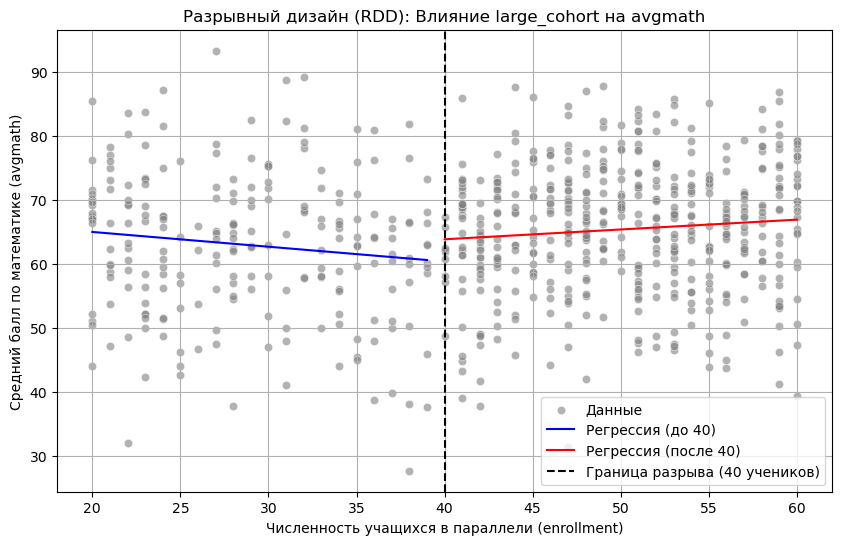

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df_below = df[df["enrollment"] < 40]
df_above = df[df["enrollment"] >= 40]

model_below = smf.ols("avgmath ~ enrollment", data=df_below).fit()
model_above = smf.ols("avgmath ~ enrollment", data=df_above).fit()

x_below = np.linspace(20, 39, 100)
y_below = model_below.predict(pd.DataFrame({"enrollment": x_below}))

x_above = np.linspace(40, 60, 100)
y_above = model_above.predict(pd.DataFrame({"enrollment": x_above}))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["enrollment"], y=df["avgmath"], alpha=0.6, label="Данные", color="gray")

plt.plot(x_below, y_below, color="blue", label="Регрессия (до 40)")
plt.plot(x_above, y_above, color="red", label="Регрессия (после 40)")

plt.axvline(x=40, color="black", linestyle="dashed", label="Граница разрыва (40 учеников)")

plt.xlabel("Численность учащихся в параллели (enrollment)")
plt.ylabel("Средний балл по математике (avgmath)")
plt.title("Разрывный дизайн (RDD): Влияние large_cohort на avgmath")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
#RDD без контрольных переменных
model1 = smf.ols("avgmath ~ large_cohort + classize", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     82.09
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.71e-57
Time:                        22:30:26   Log-Likelihood:                -2493.6
No. Observations:                 699   AIC:                             4997.
Df Residuals:                     694   BIC:                             5020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.8815      2.120     32.486   

In [38]:
#RDD без disadv
model2 = smf.ols("avgmath ~ large_cohort + classize + enrollment", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     82.09
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.71e-57
Time:                        22:30:26   Log-Likelihood:                -2493.6
No. Observations:                 699   AIC:                             4997.
Df Residuals:                     694   BIC:                             5020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.8815      2.120     32.486   

In [39]:
#RDD без enrollment
model3 = smf.ols("avgmath ~ large_cohort + classize + disadv", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     82.09
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.71e-57
Time:                        22:30:27   Log-Likelihood:                -2493.6
No. Observations:                 699   AIC:                             4997.
Df Residuals:                     694   BIC:                             5020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.8815      2.120     32.486   

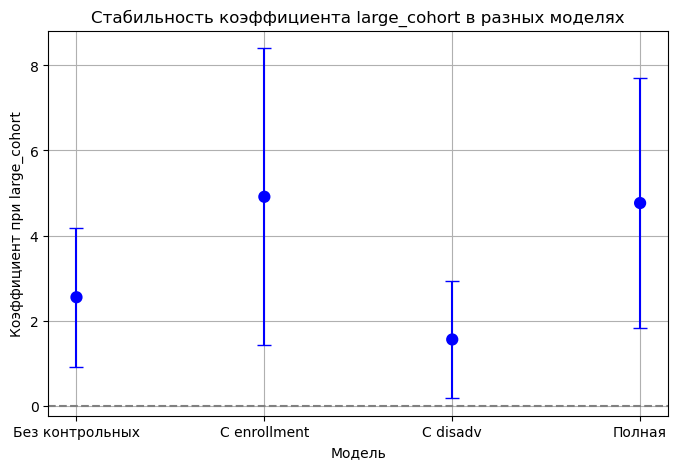

In [41]:
models = {
    "Без контрольных": model1,
    "С enrollment": model2,
    "С disadv": model3,
    "Полная": model
}

results = pd.DataFrame({
    "Модель": models.keys(),
    "Коэффициент": [m.params["large_cohort"] for m in models.values()],
    "Нижняя граница": [m.conf_int().loc["large_cohort", 0] for m in models.values()],
    "Верхняя граница": [m.conf_int().loc["large_cohort", 1] for m in models.values()]
})

plt.figure(figsize=(8, 5))
sns.pointplot(data=results, x="Модель", y="Коэффициент", join=False, color="blue")
plt.errorbar(results["Модель"], results["Коэффициент"], 
             yerr=[results["Коэффициент"] - results["Нижняя граница"], 
                   results["Верхняя граница"] - results["Коэффициент"]],
             fmt='o', color='blue', capsize=5)

plt.axhline(0, linestyle="dashed", color="gray")
plt.xlabel("Модель")
plt.ylabel("Коэффициент при large_cohort")
plt.title("Стабильность коэффициента large_cohort в разных моделях")
plt.grid(True)
plt.show()

In [47]:
#RDD sq
df["enrollment_sq"] = df["enrollment"] ** 2
model_sq = smf.ols("avgmath ~ large_cohort + classize + disadv + enrollment + enrollment_sq", data=df).fit()
print(model_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     67.95
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           8.62e-58
Time:                        22:45:04   Log-Likelihood:                -2489.5
No. Observations:                 699   AIC:                             4991.
Df Residuals:                     693   BIC:                             5018.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        80.7790      4.694     17.209

In [48]:
#placebo
model_placebo = smf.ols("disadv ~ large_cohort + classize + enrollment + enrollment**2", data=df).fit()
print(model_placebo.summary())

                            OLS Regression Results                            
Dep. Variable:                 disadv   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     7.928
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           3.33e-05
Time:                        22:59:43   Log-Likelihood:                -2956.4
No. Observations:                 699   AIC:                             5921.
Df Residuals:                     695   BIC:                             5939.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       37.7362      3.851      9.799   

/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_581/545193775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left["predicted"] = model_left.predict(df_left["enrollment"])
/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_581/545193775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_right["predicted"] = model_right.predict(df_right["enrollment"])


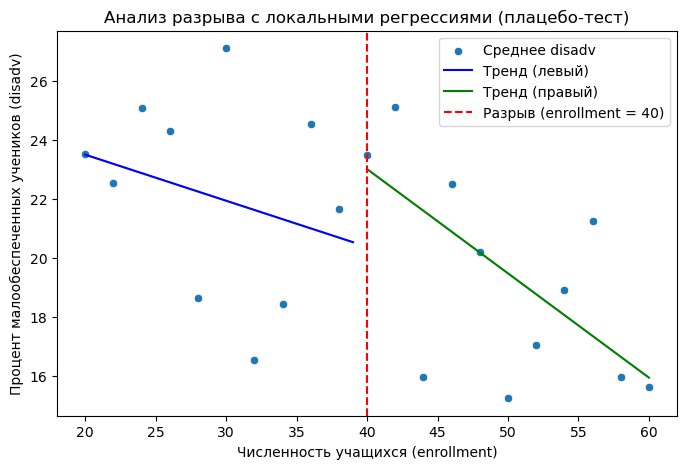

In [51]:
df_left = df[df["enrollment"] < 40]
df_right = df[df["enrollment"] >= 40]

model_left = smf.ols("disadv ~ enrollment", data=df_left).fit()
df_left["predicted"] = model_left.predict(df_left["enrollment"])

model_right = smf.ols("disadv ~ enrollment", data=df_right).fit()
df_right["predicted"] = model_right.predict(df_right["enrollment"])

df["enrollment_bin"] = df["enrollment"] // 2 * 2
df_avg = df.groupby("enrollment_bin")["disadv"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_avg["enrollment_bin"], y=df_avg["disadv"], label="Среднее disadv")

sns.lineplot(x=df_left["enrollment"], y=df_left["predicted"], color="blue", label="Тренд (левый)")
sns.lineplot(x=df_right["enrollment"], y=df_right["predicted"], color="green", label="Тренд (правый)")

plt.axvline(x=40, color='red', linestyle='--', label="Разрыв (enrollment = 40)")

plt.xlabel("Численность учащихся (enrollment)")
plt.ylabel("Процент малообеспеченных учеников (disadv)")
plt.title("Анализ разрыва с локальными регрессиями (плацебо-тест)")
plt.legend()
plt.show()